In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

In [30]:
data = pd.read_csv("/Users/zeel/Desktop/research/GLINT_1.0.4/bangl_gwma.pval.txt",delimiter="\t")
#data
data_pvals = data[["pval", "adj.pval"]]

In [31]:
data_pvals

,pval,adj.pval
cg00000957,0.121940,0.999967
cg00001349,0.756170,0.999967
cg00001583,0.666716,0.999967
cg00002028,0.222924,0.999967
cg00002719,0.968097,0.999967
...,...,...
ch.22.909671F,0.647909,0.999967
ch.22.46830341F,0.689321,0.999967
ch.22.1008279F,0.967079,0.999967
ch.22.47579720R,0.957817,0.999967


In [32]:
sorted_pvals = data_pvals.sort_values(by="pval")

In [33]:
sorted_pvals = sorted_pvals.reset_index()
sorted_pvals = sorted_pvals.rename(columns={"index":"ID_Column"})
sorted_pvals

,ID_Column,pval,adj.pval
0,cg19921651,0.000005,0.999967
1,cg07553761,0.000005,0.999967
2,cg02579389,0.000010,0.999967
3,cg26321670,0.000011,0.999967
4,cg23695794,0.000016,0.999967
...,...,...,...
422790,cg06537201,0.999982,0.999992
422791,cg06269115,0.999993,0.999999
422792,cg07000438,0.999995,0.999999
422793,cg11494773,0.999998,0.999999


In [34]:
sorted_pvals.iloc[:10]

,ID_Column,pval,adj.pval
0,cg19921651,0.000005,0.999967
1,cg07553761,0.000005,0.999967
2,cg02579389,0.000010,0.999967
3,cg26321670,0.000011,0.999967
4,cg23695794,0.000016,0.999967
5,cg16054590,0.000020,0.999967
6,cg14192979,0.000021,0.999967
7,cg12374431,0.000022,0.999967
8,cg19367800,0.000028,0.999967
9,cg04608330,0.000029,0.999967


In [35]:
ilum = pd.read_csv("~/Desktop/research/IluminaManifestShortened.csv")
ilum


/Users/zeel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,IlmnID,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
0,cg00035864,cg00035864,Y,8553009.0,TTTY18,TSS1500
1,cg00050873,cg00050873,Y,9363356.0,TSPY4;FAM197Y2,Body;TSS1500
2,cg00061679,cg00061679,Y,25314171.0,DAZ1;DAZ4;DAZ4,Body;Body;Body
3,cg00063477,cg00063477,Y,22741795.0,EIF1AY,Body
4,cg00121626,cg00121626,Y,21664296.0,BCORL2,Body
...,...,...,...,...,...,...
486423,65622344,NORM_T,NaN,NaN,NaN,NaN
486424,57640346,NORM_C,NaN,NaN,NaN,NaN
486425,47715450,NORM_T,NaN,NaN,NaN,NaN
486426,28673402,NORM_C,NaN,NaN,NaN,NaN


In [36]:
ilum_df = pd.DataFrame(ilum)
ilum_df = ilum_df.rename(columns={"IlmnID":"ID_Column"})
ilum_df

,ID_Column,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
0,cg00035864,cg00035864,Y,8553009.0,TTTY18,TSS1500
1,cg00050873,cg00050873,Y,9363356.0,TSPY4;FAM197Y2,Body;TSS1500
2,cg00061679,cg00061679,Y,25314171.0,DAZ1;DAZ4;DAZ4,Body;Body;Body
3,cg00063477,cg00063477,Y,22741795.0,EIF1AY,Body
4,cg00121626,cg00121626,Y,21664296.0,BCORL2,Body
...,...,...,...,...,...,...
486423,65622344,NORM_T,NaN,NaN,NaN,NaN
486424,57640346,NORM_C,NaN,NaN,NaN,NaN
486425,47715450,NORM_T,NaN,NaN,NaN,NaN
486426,28673402,NORM_C,NaN,NaN,NaN,NaN


In [37]:
combined_df=pd.merge(sorted_pvals,ilum_df,on="ID_Column")
combined_df

,ID_Column,pval,adj.pval,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
0,cg19921651,0.000005,0.999967,cg19921651,10,44494208.0,NaN,NaN
1,cg07553761,0.000005,0.999967,cg07553761,3,160167977.0,TRIM59,TSS1500
2,cg02579389,0.000010,0.999967,cg02579389,21,46407004.0,NaN,NaN
3,cg26321670,0.000011,0.999967,cg26321670,7,100040981.0,NaN,NaN
4,cg23695794,0.000016,0.999967,cg23695794,10,1725096.0,ADARB2,Body
...,...,...,...,...,...,...,...,...
422790,cg06537201,0.999982,0.999992,cg06537201,12,58330115.0,NaN,NaN
422791,cg06269115,0.999993,0.999999,cg06269115,11,68451849.0,GAL,TSS200
422792,cg07000438,0.999995,0.999999,cg07000438,20,3073301.0,NaN,NaN
422793,cg11494773,0.999998,0.999999,cg11494773,7,48128242.0,UPP1;UPP1,TSS200;TSS1500


In [38]:
combined_df[0:1001]


,ID_Column,pval,adj.pval,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
0,cg19921651,0.000005,0.999967,cg19921651,10,44494208.0,NaN,NaN
1,cg07553761,0.000005,0.999967,cg07553761,3,160167977.0,TRIM59,TSS1500
2,cg02579389,0.000010,0.999967,cg02579389,21,46407004.0,NaN,NaN
3,cg26321670,0.000011,0.999967,cg26321670,7,100040981.0,NaN,NaN
4,cg23695794,0.000016,0.999967,cg23695794,10,1725096.0,ADARB2,Body
...,...,...,...,...,...,...,...,...
996,cg11136251,0.003602,0.999967,cg11136251,15,66797427.0,ZWILCH;ZWILCH;RPL4,TSS200;TSS200;TSS1500
997,cg12090177,0.003603,0.999967,cg12090177,11,71202719.0,NADSYN1,Body
998,cg11807446,0.003604,0.999967,cg11807446,4,189027813.0,TRIML2,TSS1500
999,cg09942220,0.003610,0.999967,cg09942220,7,86850688.0,NaN,NaN


In [39]:
gene_names = []

for i in combined_df[combined_df["pval"] < 0.005].dropna()["Gene_Name"]:
    i.split(";")[0]
    gene_names.append(i.split(";")[0])

In [40]:
with open("bangl_gene_names.txt", "w") as f:
    for item in gene_names:
        f.write("%s\n" % item)

In [41]:
print(combined_df[combined_df["pval"] < 0.005])

       ID_Column      pval  adj.pval        Name CHR      MAPINFO  \
0     cg19921651  0.000005  0.999967  cg19921651  10   44494208.0   
1     cg07553761  0.000005  0.999967  cg07553761   3  160167977.0   
2     cg02579389  0.000010  0.999967  cg02579389  21   46407004.0   
3     cg26321670  0.000011  0.999967  cg26321670   7  100040981.0   
4     cg23695794  0.000016  0.999967  cg23695794  10    1725096.0   
...          ...       ...       ...         ...  ..          ...   
1371  cg02915015  0.004980  0.999967  cg02915015   6   24911329.0   
1372  cg26748598  0.004984  0.999967  cg26748598  13   24091341.0   
1373  cg24739849  0.004992  0.999967  cg24739849  10  104781300.0   
1374  cg11481451  0.004994  0.999967  cg11481451   5  126370787.0   
1375  cg24236085  0.004998  0.999967  cg24236085   1   34631450.0   

          Gene_Name UCSC_RefGene_Group  
0               NaN                NaN  
1            TRIM59            TSS1500  
2               NaN                NaN  
3      

In [42]:
df = combined_df[combined_df["pval"] < 0.005].dropna()

In [43]:
combined_df["UCSC_RefGene_Group"] = combined_df["UCSC_RefGene_Group"].astype(str)

In [44]:
top_cpgs = combined_df[combined_df["pval"] < 0.005]["UCSC_RefGene_Group"]

In [45]:
top_cpgs

0                  nan
1              TSS1500
2                  nan
3                  nan
4                 Body
             ...      
1371            TSS200
1372               nan
1373         Body;Body
1374               nan
1375    TSS200;TSS1500
Name: UCSC_RefGene_Group, Length: 1376, dtype: object

In [46]:
group_list=[]
for i in list(top_cpgs):
    if not i == "nan":
        group_list.append(str(i).split(";")[0])
    else:
        group_list.append('intergenic')
#print(group_list)
    

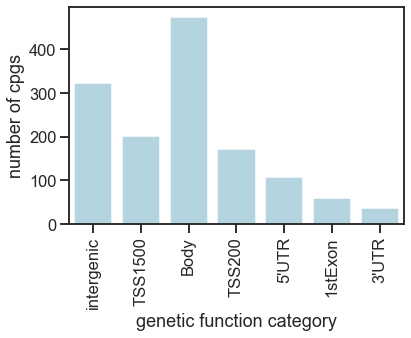

In [47]:
import matplotlib.pyplot as plt 

sns.countplot(group_list, color="lightblue")
plt.xticks(rotation=90)
plt.xlabel("genetic function category")
plt.ylabel("number of cpgs")
plt.show()

In [48]:
top_cpgs = combined_df[combined_df["pval"] < 0.005]

AttributeError: module 'seaborn' has no attribute 'set_scale'

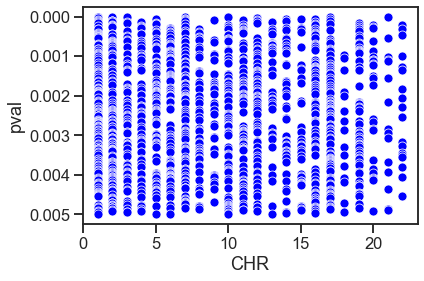

In [49]:
import matplotlib.pyplot as plt 

sns.scatterplot(top_cpgs["CHR"], top_cpgs["pval"], color="blue").invert_yaxis()
sns.set_scale('log')
plt.xticks(rotation=90)
plt.xlabel("genetic function category")
plt.ylabel("number of cpgs")
plt.show()

In [50]:
data_2g = pd.read_csv("/Users/zeel/Desktop/git/data_a/ttest_2G.pval.txt",delimiter="\t")
#data
data_2g_pvals = data_2g[["pval", "adj.pval"]]

In [51]:
sorted_2g_pvals = data_2g_pvals.sort_values(by="pval")

In [52]:
sorted_2g_pvals = sorted_2g_pvals.reset_index()
sorted_2g_pvals = sorted_2g_pvals.rename(columns={"index":"ID_Column"})
sorted_2g_pvals

,ID_Column,pval,adj.pval
0,cg23695794,0.000006,0.995393
1,cg07553761,0.000015,0.995393
2,cg02650017,0.000015,0.995393
3,cg11878712,0.000017,0.995393
4,cg19921651,0.000018,0.995393
...,...,...,...
422790,cg07163640,0.999987,0.999992
422791,cg21553189,0.999987,0.999992
422792,cg20711828,0.999987,0.999992
422793,cg15725933,0.999991,0.999993


In [53]:
sorted_2g_pvals.iloc[10:20]

,ID_Column,pval,adj.pval
10,cg04963514,0.000056,0.995393
11,cg02096663,0.000058,0.995393
12,cg11045529,0.000059,0.995393
13,cg04203853,0.000062,0.995393
14,cg27127645,0.000064,0.995393
15,cg09635866,0.000073,0.995393
16,cg01869548,0.000085,0.995393
17,cg02847389,0.000092,0.995393
18,cg14707006,0.000093,0.995393
19,cg17741809,0.000093,0.995393


In [54]:
combined_2g_df=pd.merge(sorted_2g_pvals,ilum_df,on="ID_Column")
combined_2g_df[0:21]

,ID_Column,pval,adj.pval,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
0,cg23695794,0.000006,0.995393,cg23695794,10,1725096.0,ADARB2,Body
1,cg07553761,0.000015,0.995393,cg07553761,3,160167977.0,TRIM59,TSS1500
2,cg02650017,0.000015,0.995393,cg02650017,17,47301614.0,PHOSPHO1;PHOSPHO1,Body;Body
3,cg11878712,0.000017,0.995393,cg11878712,2,135018453.0,MGAT5,Body
4,cg19921651,0.000018,0.995393,cg19921651,10,44494208.0,NaN,NaN
5,cg00389446,0.000028,0.995393,cg00389446,4,17516739.0,CLRN2,TSS200
6,cg09022952,0.000042,0.995393,cg09022952,11,65820066.0,SF3B2,Body
7,cg24085801,0.000045,0.995393,cg24085801,12,132943117.0,NaN,NaN
8,cg03114945,0.000049,0.995393,cg03114945,16,87727345.0,JPH3,Body
9,cg06279276,0.000050,0.995393,cg06279276,16,67184164.0,B3GNT9,Body


In [62]:
panther = []
for i in combined_2g_df[combined_2g_df["pval"] < 0.005].dropna()["Gene_Name"]:
    print(i.split(";")[0])
    panther.append(i)
len(panther)

ADARB2
TRIM59
PHOSPHO1
MGAT5
CLRN2
SF3B2
JPH3
B3GNT9
LOC285501
SAMD4A
FLYWCH2
ARHGAP22
LIPA
HDAC7
CREB5
LOC644649
FGFR1
PCDHGA4
RUNX1
OPCML
ZNF174
CALM3
SFI1
PSD3
KIFAP3
SLITRK5
SNTG2
RNF39
ANKRD30A
UBFD1
SH3PXD2A
ZFR2
ROBO1
TMEM184A
ZC3H13
MX1
AKAP13
TRIM68
RPL39L
TMEM51
KCNAB3
KIAA1324
PRKAR1B
GALR1
FKBP10
AIM1
CWF19L2
OBSCN
RASA3
TTC31
CDC37
ARHGEF7
LVRN
RUNX2
THUMPD1
TBC1D10C
ADO
SPDYA
TIGD4
WDR41
LSM10
PABPN1
CDKN1C
ABL1
FOXO3
BAIAP3
LY9
KCNQ1OT1
MAPK8IP3
GBP7
PIP5KL1
PPP1R12A
ESPN
GMEB1
ZNF597
MIR548N
BCL11B
TNFRSF10A
C7orf60
PELI3
UTS2
HAR1B
LOH12CR1
HHAT
KHDRBS1
DPH1
HAR1B
SLITRK6
TMEM44
TNXB
LOC401127
ELTD1
AGPAT1
SOX18
IRS2
PCDHGA4
ZNF251
HOXA2
CCDC103
DNALI1
SH2B3
POLQ
SH2B2
ABCC13
KCNAB3
TBKBP1
TMEM51
SUSD3
ARHGDIG
THADA
TMEM132C
RUNX1
PHKG1
NBEA
HKDC1
KCNAB3
GANAB
NEURL4
SAMD12
PRKD2
HMGCR
LACTB
FLJ90757
CDCA7L
ADAM2
MEIG1
SNCB
KRT27
PTPRN2
TTPA
C7orf50
AS3MT
GALK1
HOXB2
IFT140
CAPRIN2
AGPAT1
ARID3B
RNF39
YWHAZ
ACACB
LOC285830
CUX1
DPP9
SPARC
PAK7
SMTNL2
MAML3
NKX2-4
PPPDE

859

In [56]:
combined_2g_df

,ID_Column,pval,adj.pval,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
0,cg23695794,0.000006,0.995393,cg23695794,10,1725096.0,ADARB2,Body
1,cg07553761,0.000015,0.995393,cg07553761,3,160167977.0,TRIM59,TSS1500
2,cg02650017,0.000015,0.995393,cg02650017,17,47301614.0,PHOSPHO1;PHOSPHO1,Body;Body
3,cg11878712,0.000017,0.995393,cg11878712,2,135018453.0,MGAT5,Body
4,cg19921651,0.000018,0.995393,cg19921651,10,44494208.0,NaN,NaN
...,...,...,...,...,...,...,...,...
422790,cg07163640,0.999987,0.999992,cg07163640,2,366012.0,NaN,NaN
422791,cg21553189,0.999987,0.999992,cg21553189,3,155520325.0,C3orf33,Body
422792,cg20711828,0.999987,0.999992,cg20711828,6,129204125.0,LAMA2;LAMA2,TSS200;TSS200
422793,cg15725933,0.999991,0.999993,cg15725933,21,46962202.0,SLC19A1,5'UTR
